In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('問卷調查_編碼過1_後半.csv',encoding='utf_8_sig')
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss #標準化

X = df #標準化
sc = ss()
X = sc.fit_transform(X)

kms = KMeans(n_clusters=9, random_state=42) 
y_pred = kms.fit_predict(X)
print(kms.cluster_centers_)

In [ ]:
kms.labels_

Text(0, 0.5, '集群內的誤差平方和')

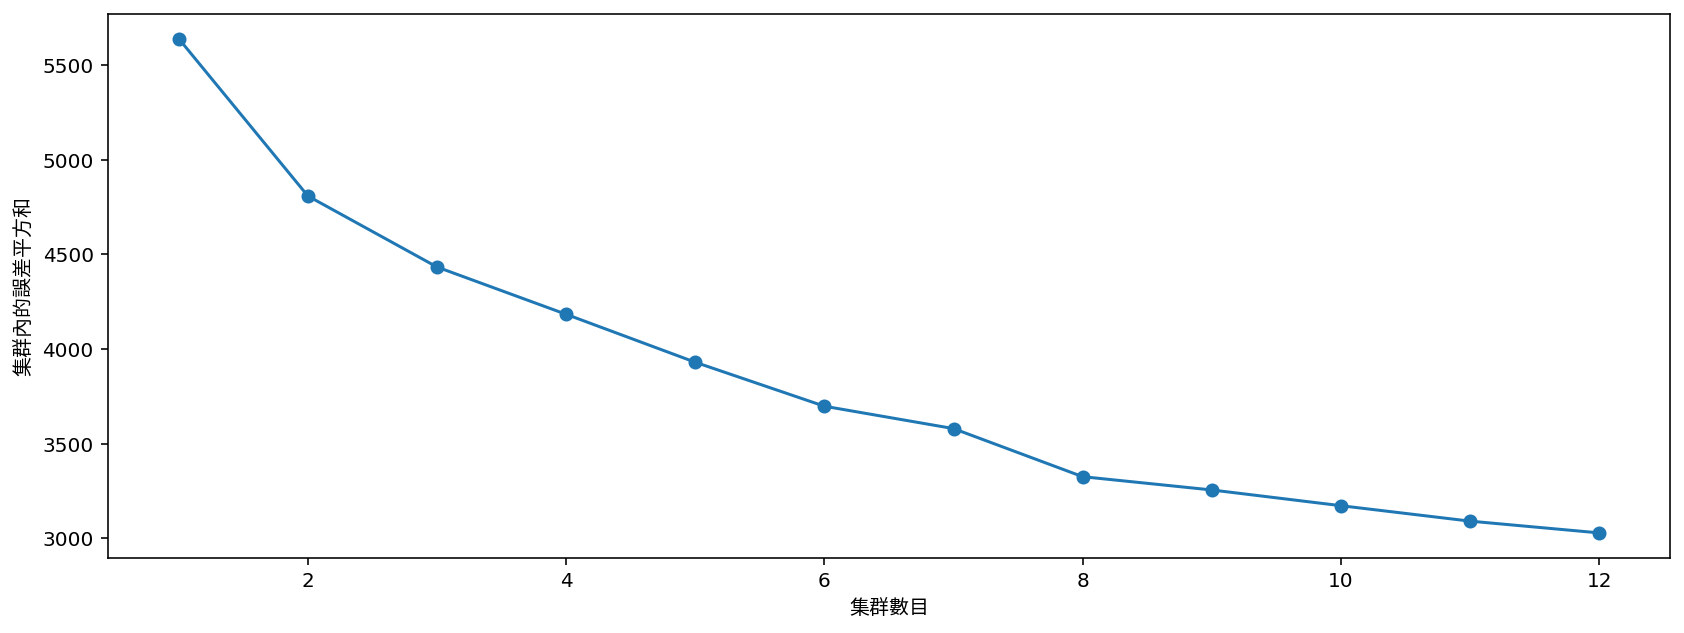

In [ ]:
errors = []
for i in range(1,13):
    kms1 = KMeans(n_clusters=i)
    kms1.fit(X)
    errors.append(kms1.inertia_) #.inertia_存放「集群內的誤差平方和」。

plt.figure(figsize=(14, 5))
plt.plot(list(range(1,13)), errors, marker='o')
# plt.xlabel('集群數目', fontproperties=myfont)
# plt.ylabel('集群內的誤差平方和', fontproperties=myfont)
plt.xlabel('集群數目', fontproperties=myfont)
plt.ylabel('集群內的誤差平方和', fontproperties=myfont)

In [ ]:
four_cluster_df = df.copy(deep=True)

four_cluster_df['Cluster'] = kms.labels_
four_cluster_df.head()

In [ ]:
four_cluster_df.groupby('Cluster').count()

In [ ]:
df1 = four_cluster_df[four_cluster_df['Cluster']==1]
df1

In [ ]:
df0 = four_cluster_df[four_cluster_df['Cluster']==0]
df0

In [ ]:
df1 = four_cluster_df[four_cluster_df['Cluster']==1]
df1

In [ ]:
df2 = four_cluster_df[four_cluster_df['Cluster']==2]
df2

In [ ]:
df3 = four_cluster_df[four_cluster_df['Cluster']==3]
df3

In [ ]:
df4 = four_cluster_df[four_cluster_df['Cluster']==4]
df4

In [ ]:
df5 = four_cluster_df[four_cluster_df['Cluster']==5]
df5

In [ ]:
df6 = four_cluster_df[four_cluster_df['Cluster']==6]
df6

In [ ]:
df7 = four_cluster_df[four_cluster_df['Cluster']==7]
df7

In [ ]:
df8 = four_cluster_df[four_cluster_df['Cluster']==8]
df8

product logistic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [ ]:
product = pd.concat([df3,df7], axis=0)
product.shape

(47, 25)

In [ ]:
print('total conversions: %i out of %i' % (product.購買與否.sum(), product.shape[0]))

total conversions: 38 out of 47


In [ ]:
print('conversion rate: %0.2f%%' % (product.購買與否.sum() / product.shape[0] * 100.0))

conversion rate: 80.85%


不購買 19.15 % of the dataset
購買 80.85 % of the dataset


Text(0.5, 0, '購買與否')

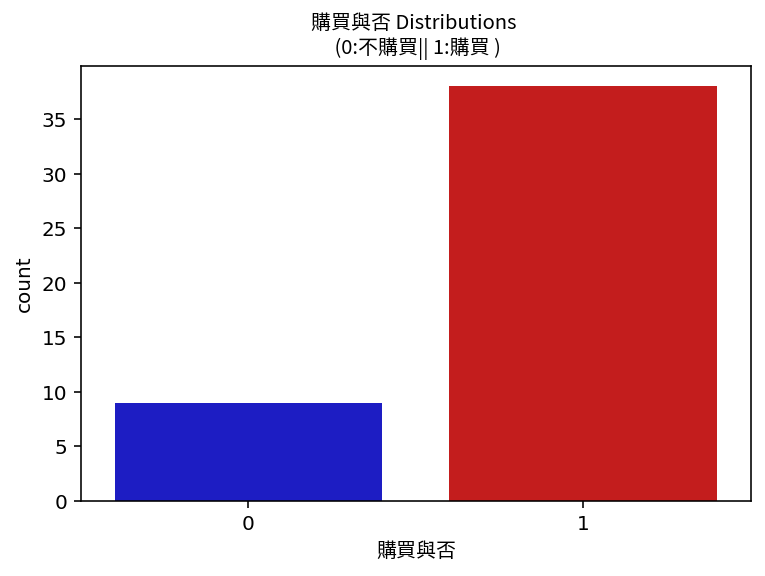

In [ ]:
# The 購買與否es are heavily skewed we need to solve this issue later.
print('不購買', round(product['購買與否'].value_counts()[0]/len(product) * 100,2), '% of the dataset')
print('購買', round(product['購買與否'].value_counts()[1]/len(product) * 100,2), '% of the dataset')

# 看看y變數的分佈
colors = ["#0101DF", "#DF0101"]
sns.countplot('購買與否', data=product, palette=colors)
plt.title('購買與否 Distributions \n (0:不購買|| 1:購買 )', fontsize=14,fontproperties=myfont)
plt.xlabel("購買與否",fontproperties=myfont)

In [ ]:
from sklearn.model_selection import train_test_split

X = product.drop(columns=['購買與否'])
y = product['購買與否']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[ 0.33474911,  0.16119311,  0.        , -0.16003626,  0.15760221,
         0.00237945,  0.        , -0.07308538, -0.02941818, -0.12099062,
        -0.09426553, -0.07904604,  1.02791704, -0.13396982,  0.00909505,
         0.03632495, -0.29597806,  1.0980006 ,  0.40107092,  0.10220165,
        -0.1180726 ,  0.11595094, -0.0211619 , -0.65041659]])

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns=['實際','預測']).head()

,實際,預測
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print('整體正確率:', accuracy_score(y_test, y_pred).round(2))
# 另一個快速得到正確率的方法
print('另一個得到正確率的方法', model.score(X_test, y_test).round(2))

     預測1  預測2
實際1    1    4
實際2    1   18
整體正確率: 0.79
另一個得到正確率的方法 0.79


Practicality

In [ ]:
Practicality = pd.concat([df2,df3,df4,df6,df8], axis=0)
Practicality.shape

(166, 25)

不購買 27.11 % of the dataset
購買 72.89 % of the dataset


Text(0.5, 0, '購買與否')

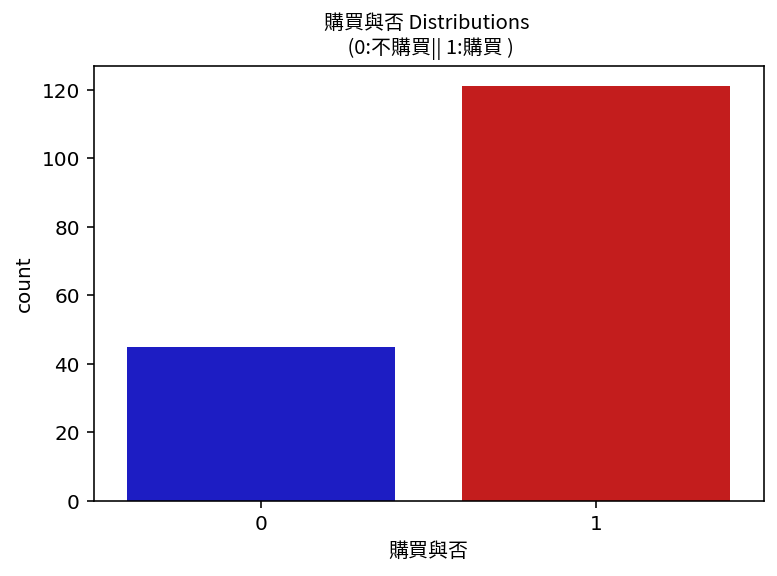

In [ ]:
# The 購買與否es are heavily skewed we need to solve this issue later.
print('不購買', round(Practicality['購買與否'].value_counts()[0]/len(Practicality) * 100,2), '% of the dataset')
print('購買', round(Practicality['購買與否'].value_counts()[1]/len(Practicality) * 100,2), '% of the dataset')

# 看看y變數的分佈
colors = ["#0101DF", "#DF0101"]
sns.countplot('購買與否', data=Practicality, palette=colors)
plt.title('購買與否 Distributions \n (0:不購買|| 1:購買 )', fontsize=14,fontproperties=myfont)
plt.xlabel("購買與否",fontproperties=myfont)

In [ ]:
print('total conversions: %i out of %i' % (Practicality.購買與否.sum(), Practicality.shape[0]))

total conversions: 121 out of 166


In [ ]:
print('conversion rate: %0.2f%%' % (Practicality.購買與否.sum() / Practicality.shape[0] * 100.0))

conversion rate: 72.89%


In [ ]:
from sklearn.model_selection import train_test_split

X = Practicality.drop(columns=['購買與否'])
y = Practicality['購買與否']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[ 0.40763567, -0.06237811, -0.24436887, -0.07174508,  0.309803  ,
         0.00561218,  0.        , -0.11188915, -0.58393232, -0.08505064,
         0.06618111, -0.26591895,  0.24770602,  0.41443161, -0.93177526,
         0.6029894 ,  0.34151622,  0.55475448,  0.42358836,  0.08979673,
         0.77329217, -1.27884557, -0.36148458, -0.23533824]])

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 1, 0, 0, 0])

In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns=['實際','預測']).head()

,實際,預測
0,1,1
1,1,1
2,1,0
3,1,0
4,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print('整體正確率:', accuracy_score(y_test, y_pred).round(2))
# 另一個快速得到正確率的方法
print('另一個得到正確率的方法', model.score(X_test, y_test).round(2))

     預測1  預測2
實際1    5   18
實際2    9   51
整體正確率: 0.67
另一個得到正確率的方法 0.67


Professionalism

In [ ]:
Professionalism = pd.concat([df0,df2,df7], axis=0)
Professionalism.shape

(102, 25)

不購買 20.59 % of the dataset
購買 79.41 % of the dataset


Text(0.5, 0, '購買與否')

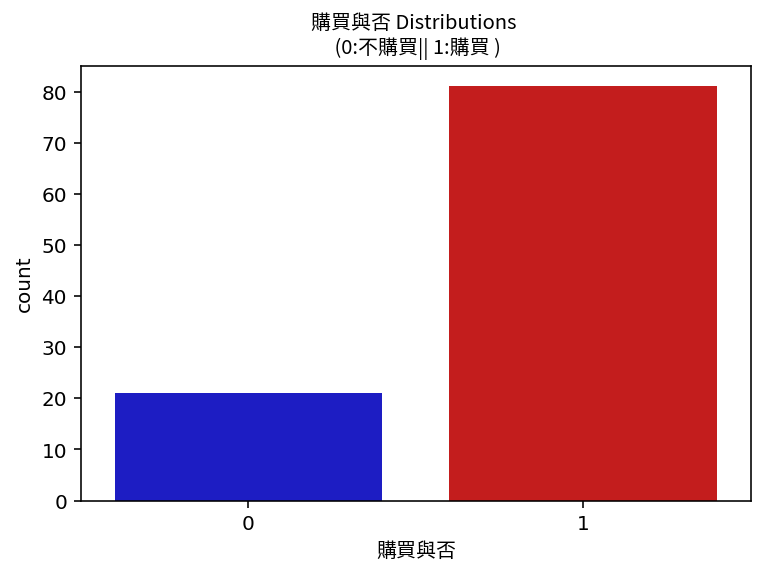

In [ ]:
# The 購買與否es are heavily skewed we need to solve this issue later.
print('不購買', round(Professionalism['購買與否'].value_counts()[0]/len(Professionalism) * 100,2), '% of the dataset')
print('購買', round(Professionalism['購買與否'].value_counts()[1]/len(Professionalism) * 100,2), '% of the dataset')

# 看看y變數的分佈
colors = ["#0101DF", "#DF0101"]
sns.countplot('購買與否', data=Professionalism, palette=colors)
plt.title('購買與否 Distributions \n (0:不購買|| 1:購買 )', fontsize=14,fontproperties=myfont)
plt.xlabel("購買與否",fontproperties=myfont)

In [ ]:
print('total conversions: %i out of %i' % (Professionalism.購買與否.sum(), Professionalism.shape[0]))

total conversions: 81 out of 102


In [ ]:
print('conversion rate: %0.2f%%' % (Professionalism.購買與否.sum() / Professionalism.shape[0] * 100.0))

conversion rate: 79.41%


In [ ]:
from sklearn.model_selection import train_test_split

X = Professionalism.drop(columns=['購買與否'])
y = Professionalism['購買與否']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[-0.238318  ,  0.50812224,  0.        ,  0.05102523, -0.02514096,
         0.00500102,  0.        ,  0.57776776, -0.15664134, -0.37619755,
         0.25278065, -1.1749534 , -0.18380887,  0.47970118,  0.2576758 ,
        -0.53765482, -0.34485668,  0.02852359, -0.37037313,  0.55918686,
        -0.24951536, -0.02713895,  0.23592857, -0.46999449]])

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print('整體正確率:', accuracy_score(y_test, y_pred).round(2))
# 另一個快速得到正確率的方法
print('另一個得到正確率的方法', model.score(X_test, y_test).round(2))

     預測1  預測2
實際1    3    6
實際2    5   37
整體正確率: 0.78
另一個得到正確率的方法 0.78


looks


In [ ]:
looks = pd.concat([df5], axis=0)
looks.shape

(14, 25)

In [ ]:
print('total conversions: %i out of %i' % (looks.購買與否.sum(), looks.shape[0]))

total conversions: 6 out of 14


In [ ]:
print('conversion rate: %0.2f%%' % (looks.購買與否.sum() / looks.shape[0] * 100.0))

conversion rate: 42.86%


不購買 57.14 % of the dataset
購買 42.86 % of the dataset


Text(0.5, 0, '購買與否')

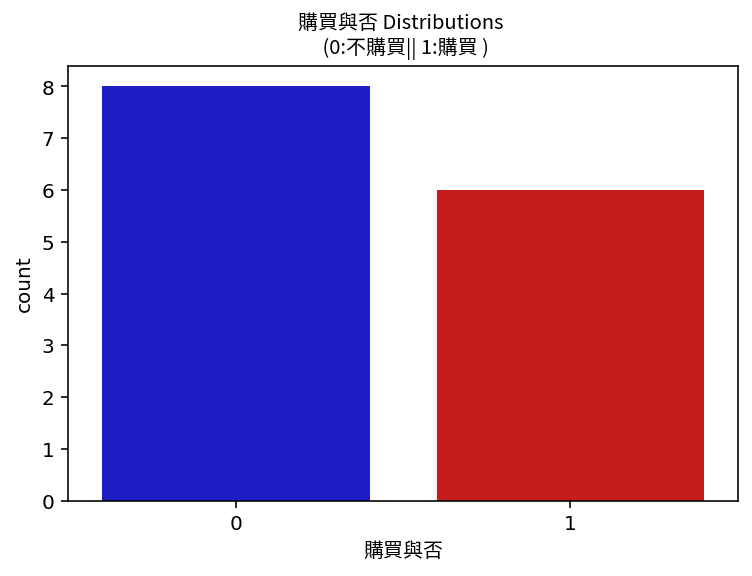

In [ ]:
# The 購買與否es are heavily skewed we need to solve this issue later.
print('不購買', round(looks['購買與否'].value_counts()[0]/len(looks) * 100,2), '% of the dataset')
print('購買', round(looks['購買與否'].value_counts()[1]/len(looks) * 100,2), '% of the dataset')

# 看看y變數的分佈
colors = ["#0101DF", "#DF0101"]
sns.countplot('購買與否', data=looks, palette=colors)
plt.title('購買與否 Distributions \n (0:不購買|| 1:購買 )', fontsize=14,fontproperties=myfont)
plt.xlabel("購買與否",fontproperties=myfont)

In [ ]:
from sklearn.model_selection import train_test_split

X = looks.drop(columns=['購買與否'])
y = looks['購買與否']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.coef_

array([[ 4.39324172e-02, -1.81321853e-01, -4.66547268e-02,
        -6.01342113e-02,  1.06786212e-01,  0.00000000e+00,
         0.00000000e+00,  4.07090657e-01,  5.52150279e-02,
        -3.53732055e-01, -1.13700647e-01, -3.42260690e-01,
        -3.32054112e-01, -8.17725164e-06, -1.44879157e-01,
         4.01795084e-01, -8.47449455e-02,  2.92104741e-01,
        -2.92464269e-01, -1.46169877e-01,  2.58058298e-02,
        -1.56565210e-01,  1.10570925e-01, -1.36287527e-05]])

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print(pd.DataFrame(cm, index=['實際1', '實際2'], columns=['預測1', '預測2']))
print('整體正確率:', accuracy_score(y_test, y_pred).round(2))
# 另一個快速得到正確率的方法
print('另一個得到正確率的方法', model.score(X_test, y_test).round(2))

     預測1  預測2
實際1    2    0
實際2    4    1
整體正確率: 0.43
另一個得到正確率的方法 0.43
